![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Resampling
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

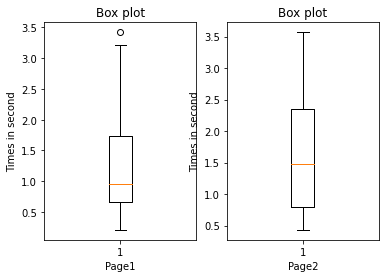

In [4]:
session_times = pd.read_csv('E:\machine_learning_projects\Statistics for Data Science\Stat test and Significance\web_page_data.csv')
mask1 = session_times.Page == 'Page A'
mask2 = session_times.Page == 'Page B'

# ploti=ting box plot
fig,(ax1, ax2) = plt.subplots(1,2)

ax1.boxplot(session_times.loc[mask1].Time)
ax2.boxplot(session_times.loc[mask2].Time)

ax1.set_xlabel('Page1')
ax1.set_ylabel('Times in second')
ax1.set_title('Box plot')

ax2.set_xlabel('Page2')
ax2.set_ylabel('Times in second')
ax2.set_title('Box plot')

plt.show()


In [5]:
# Difference in Mean

mean_pageA = session_times.loc[mask1].Time.mean()
mean_pageB = session_times.loc[mask2].Time.mean()
mean_pageB - mean_pageA


0.3566666666666669

# Permutation test
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [6]:
mean_diff = []
def p_test(n =1000,na=21, nb = 18):
    for i in range(n): 

        idxa = session_times.Time.sample(na).index.values
        idxb = ~session_times.index.isin(idxa) # isnotin
        
        a_mean = session_times.loc[idxa].Time.mean()
        b_mean = session_times.loc[idxb].Time.mean()

        mean_diff.append(b_mean - a_mean )

    

In [7]:
p_test()


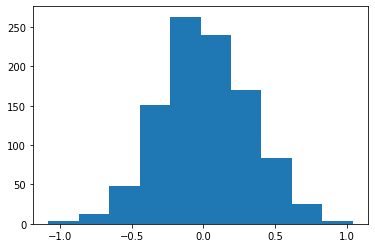

In [8]:
plt.hist(mean_diff, bins= 10)
plt.show()

## Find which one has better conversion rate

## Outcome         Price A   Price B
## Conversion      200        182
## No conversion   23,539     22,406

In [9]:
Total = 23539+200+182+22406
Total_1 = 200+182
Total_0 = 23539 +22406
Total, Total_1, Total_0

(46327, 382, 45945)

In [10]:
conversion = [1] * 382
non_conversion = [0] * 45945

price = pd.Series(conversion+non_conversion)
price.shape
price.value_counts()

0    45945
1      382
dtype: int64

In [11]:
price.value_counts()

0    45945
1      382
dtype: int64

In [12]:
distribution = []
observed_diff = 100*(200/23739 - 182/22588)
def per(data, na = 23539 +200, nb = 22406 + 182,n=1000):
    observed_diff = 100*(200/23739 - 182/22588)
    print(f'observed difference :{observed_diff:.4f}%')
    for i in range(n):
        idx_cov = data.sample(na).index
        price_a = data.loc[idx_cov].value_counts()
        idx_noncov = ~data.index.isin(idx_cov)
        price_b = data.loc[idx_noncov].value_counts()

        diff = 100*(price_a[1]/(price_a[0]+price_a[1]) - price_b[1]/(price_b[0]+price_b[1]))
        distribution.append(diff)


    fig, ax = plt.subplots()
    ax.hist(distribution,bins = 11, color = 'red', alpha = 0.25)
    ax.axvline(observed_diff)
    ax.set_xlabel('Mean Difference')
    ax.set_ylabel('Frequency')
    ax.set_title('Histogram')
    plt.show()




observed difference :0.0368%


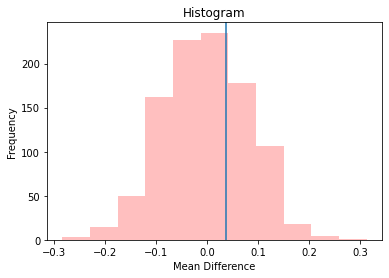

In [13]:
per(price)

# Pvalue
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## We can estimate a pvalue from our permutation test by taking the proportion of times that the permuta‐
## tion test produces a difference equal to or greater than the observed difference:

In [14]:
## If np.mean is applied to a list of booleans, it gives the percentage of how often True was found in the list (#True / #Total).
np.mean([True, True,False, False])

0.5

In [17]:
pvalue = np.mean(pd.Series(distribution) > observed_diff) 
pvalue

0.308

## The real problem is that people want more meaning from the p-value than it con‐tains. Here’s what we would like the p-value to convey:
## The probability that the result is due to chance.
## We hope for a low value, so we can conclude that we’ve proved something. This is how many journal editors were interpreting the p-value. But here’s what the p-value actually represents:
## The probability that, given a chance model, results as extreme as the observed results could occur.

## In assessing statistical significance, two types of error are possible:
## • A Type 1 error, in which you mistakenly conclude an effect is real, when it is really just due to chance
## • A Type 2 error, in which you mistakenly conclude that an effect is not real (i.e., due to chance), when it actually is real

## Actually, a Type 2 error is not so much an error as a judgment that the sample size is too small to detect the effect. When a p-value falls short of statistical significance (e.g., it exceeds 5%), what we are really saying is “effect not proven.” It could be that a larger sample would yield a smaller p-value.
## The basic function of significance tests (also called hypothesis tests) is to protect against being fooled by random chance; thus they are typically structured to mini‐ mize Type 1 errors.

# t test
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## In the 1920s and 1930s, when statistical hypothesis testing was being developed, it
## was not feasible to randomly shuffle data thousands of times to do a resampling test.
## Statisticians found that a good approximation to the permutation (shuffled) distribu‐
## tion was the t-test, based on Gosset’s t-distribution. It is used for the very common
## two-sample comparison—A/B test—in which the data is numeric. But in order for
## the t-distribution to be used without regard to scale, a standardized form of the test
## statistic must be used.

 ## 

In [18]:
import scipy.stats as stat

In [41]:
session_times
ststistic, pvalue = stat.ttest_ind(session_times.loc[session_times.Page == 'Page A'].Time, 
                session_times.loc[session_times.Page == 'Page B'].Time,
                equal_var=False)

# Multiple Testing and Alphainflation
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## For example, if you have 20 predictor variables and one outcome variable, all ran‐ domly generated, the odds are pretty good that at least one predictor will (falsely) turn out to be statistically significant if you do a series of 20 significance tests at the alpha = 0.05 level. As previously discussed, this is called a Type 1 error. You can calculate this probability by first finding the probability that all will correctly test nonsignificant at the 0.05 level. The probability that one will correctly test nonsignificant is 0.95, so the probability that all 20 will correctly test nonsignificant is 0.95 × 0.95 × 0.95…, or 0.95^20 = 0.36.1 The probability that at least one predictor will (falsely) test significant is the flip side of this probability, or 1 – (probability that all will be nonsignificant) = 0.64. This is known as alpha inflation. This issue is related to the problem of overfitting in data mining, or “fitting the model to the noise.” The more variables you add, or the more models you run, the greater the probability that something will emerge as “significant” just by chance.

# F - Distribution (ANOVA)
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Pairwise comparison--
## A hypothesis test (e.g., of means) between two groups among multiple groups.
# Omnibus test--
## A single hypothesis test of the overall variance among multiple group means.
# Decomposition of variance--
## Separation of components contributing to an individual value (e.g., from the
## overall average, from a treatment mean, and from a residual error).
# F-statistic--
## A standardized statistic that measures the extent to which differences among
## group means exceed what might be expected in a chance model.
# SS--
## “Sum of squares,” referring to deviations from some average value.


<AxesSubplot:title={'center':'Time'}, xlabel='Page'>

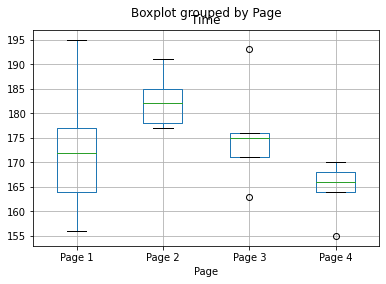

In [66]:
four_sessions = pd.read_csv('E:\machine_learning_projects\Statistics for Data Science\Stat test and Significance\Four_sessions.csv')
## Plotting box plot to check variation in mean or median amoung the groups

four_sessions.boxplot(by = 'Page',column = 'Time') 



Page
Page 1    AxesSubplot(0.125,0.125;0.775x0.755)
Page 2    AxesSubplot(0.125,0.125;0.775x0.755)
Page 3    AxesSubplot(0.125,0.125;0.775x0.755)
Page 4    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

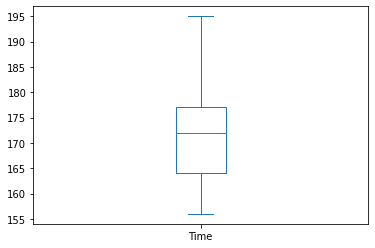

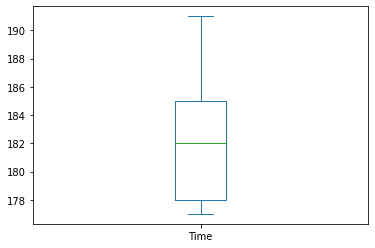

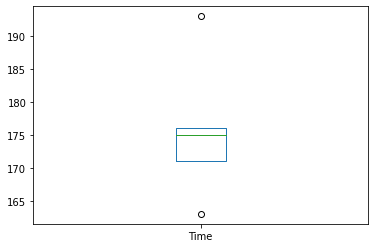

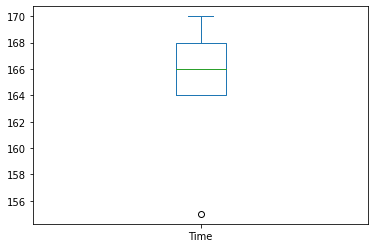

In [73]:
## plotting by groupby operation
four_sessions.groupby('Page').plot(kind = 'box')

## Pemutation test for A/B/C/D test

In [91]:
obseved_means = four_sessions.groupby('Page')['Time'].mean()
observed_var = four_sessions.groupby('Page')['Time'].mean().var()

In [106]:
def per_test(df):
    df = df.copy()
    df["Time"] = np.random.permutation(df.Time.values) # np.random.permutation() isused for shuffling the given array
    variance = df.groupby('Page').Time.mean().var()
    return variance

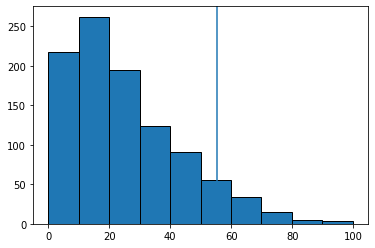

Pvalue: 0.082


In [136]:
variance = [per_test(four_sessions) for _ in range(1000)]
plt.hist(variance, bins = 10, ec = 'k')
plt.axvline(observed_var)
plt.show()


print(f'Pvalue: {np.mean(variance > observed_var)}')

# F - Statistics

## The Fstatistic is based on the ratio of the variance across group means (i.e., the treatment effect) to the variance due to residual error. The higher this ratio, the more statisti‐ cally significant the result. If the data follows a normal distribution, then statistical theory dictates that the statistic should have a certain distribution. Based on this, it is possible to compute a p-value.


In [141]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Anova used for predicting the contineous variable by using the categorical one ex. predicting the salary(contineous variable) of a person by using his degree(Categorical variable)

## Omnibus Test
## F Test for  multiple Group  (SEE note book for formulas)

In [142]:
## Building model 
model = smf.ols('Time ~ Page', data=four_sessions).fit()
aov_table = sm.stats.anova_lm(model)
aov_table


,df,sum_sq,mean_sq,F,PR(>F)
Page,3.0,831.4,277.133333,2.739825,0.077586
Residual,16.0,1618.4,101.150000,NaN,NaN


# Chi-Square Test
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## We can test with this resampling algorithm:
1. Constitute a box with 34 ones (clicks) and 2,966 zeros (no clicks).
2. Shuffle, take three separate samples of 1,000, and count the clicks in each.
3. Find the squared differences between the shuffled counts and the expected
counts and sum them.
4. Repeat steps 2 and 3, say, 1,000 times.
5. How often does the resampled sum of squared deviations exceed the observed?
That’s the p-value.

In [173]:
import random
import math
click = [1] * 34
no_click = [0] * 2966
data = click + no_click

permutation_residuals = []
expected_counts = [11.33,11.33,11.33, 988.67,988.67,988.67]
ob_counts = [14,8,12.986,992,988]


def chi(expected_counts,data):
    for i in range(1000):
        random.shuffle(data)
        df1 = data[:1000].count(1)
        df2 = data[1000:2000].count(1)
        df3 = data[2000:].count(1)
        observed_counts = [df1,df2,df3,1000-df1,1000-df2,1000-df3]
        for ob, ex in zip(observed_counts, expected_counts):
            permutation_residuals.append((ob-ex)/math.sqrt(ex))
    return permutation_residuals

fig, ax = plt.subplots()

ax.hist(chi(expected_counts,data), bins = 10, color ='red', alpha = 0.25, ec = 'k')
ax.axvline((ob_c-ex)/math.sqrt(ex))



In [174]:
chi(expected_counts,data)

[0.1990489301924727,
 -0.6922149363409872,
 0.49613688570362596,
 -0.09803902531868061,
 -0.3951269808298339,
 0.49613688570362596,
 -0.6922149363409872,
 1.387400752237086,
 -0.6922149363409872,
 0.1990489301924727,
 1.387400752237086,
 -1.583478802874447,
 -0.3951269808298339,
 0.49613688570362596,
 -0.09803902531868061,
 -1.2863908473632937,
 -0.09803902531868061,
 1.387400752237086,
 -0.3951269808298339,
 0.7932248412147792,
 -0.3951269808298339,
 -0.3951269808298339,
 -0.3951269808298339,
 0.7932248412147792,
 0.49613688570362596,
 0.49613688570362596,
 -0.9893028918521405,
 1.0903127967259325,
 -0.6922149363409872,
 -0.3951269808298339,
 -0.3951269808298339,
 0.7932248412147792,
 -0.3951269808298339,
 -0.6922149363409872,
 0.7932248412147792,
 -0.09803902531868061,
 -0.09803902531868061,
 0.1990489301924727,
 -0.09803902531868061,
 1.6844887077482391,
 -0.6922149363409872,
 -0.9893028918521405,
 -0.3951269808298339,
 0.49613688570362596,
 -0.09803902531868061,
 -0.098039025318680

In [185]:
## chi square test
from scipy import stats as stats
clicks = pd.read_csv('E:\machine_learning_projects\Statistics for Data Science\Stat test and Significance\click_rates.csv')
clicks = clicks.pivot(index = 'Click', columns = 'Headline', values = 'Rate') ## Pivot method to chage the shape of the Dataframe

In [189]:
clicks

Headline,Headline A,Headline B,Headline C
Click,,,
Click,14,8,12
No-click,986,992,988


In [195]:
ch2_value, pvalue,df, expected = stats.chi2_contingency(clicks)
print(f'Observed chi2 valu : {ch2_value}')
print(f"P value : {pvalue}")

Observed chi2 valu : 1.6659394708658917
P value : 0.4347562562343731
